ARIMA Model Results                              
Dep. Variable:               D.Active   No. Observations:                   98
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -631.031
Method:                       css-mle   S.D. of innovations            149.019
Date:                Fri, 01 May 2020   AIC                           1274.063
Time:                        08:21:20   BIC                           1289.572
Sample:                    01-23-2020   HQIC                          1280.336
                         - 04-29-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            436.4864    412.325      1.059      0.290    -371.655    1244.628
ar.L1.D.Active     0.2577      0.096      2.691      0.007       0.070       0.445
ar.L2.D.Active     0.1690      0.096      1.757      0.079      -

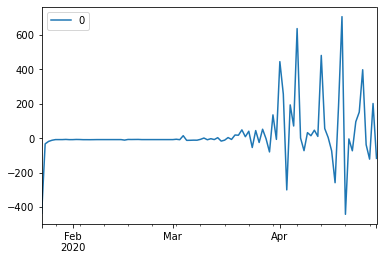

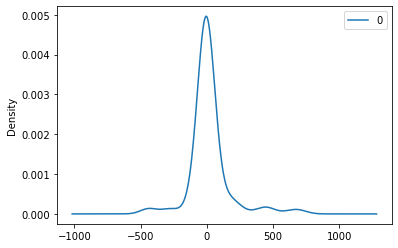

0
count   98.000000
mean    18.144202
std    154.558242
min   -442.845692
25%     -8.876710
50%     -8.332201
75%      9.779573
max    706.646751


In [4]:

import pandas as pd 
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

conf_url = 'C:\\NRI\\COVID-19\\conf.csv'
death_url = 'C:\\NRI\\COVID-19\\death.csv'
rec_url = 'C:\\NRI\\COVID-19\\rec.csv'

# Confirmed cases
conf = pd.read_csv(conf_url, encoding='utf-8', index_col=1).loc['India'].iloc[3:].rename('Confirmed')
conf.index = pd.to_datetime(conf.index,format='%m/%d/%y')

# Deaths
death = pd.read_csv(death_url, encoding='utf-8', index_col=1).loc['India'].iloc[3:].rename('Deaths')
death.index = pd.to_datetime(death.index,format='%m/%d/%y')

# Recovered cases
rec = pd.read_csv(rec_url, encoding='utf-8', index_col=1).loc['India'].iloc[3:].rename('Recovered')
rec.index = pd.to_datetime(rec.index,format='%m/%d/%y')

data_df = pd.concat([conf,death,rec], axis=1, sort=True)
data_df['Active'] = data_df['Confirmed'] - data_df['Deaths'] - data_df['Recovered']
#data_df.drop(columns=['Confirmed','Deaths','Recovered'],inplace=True)
data_df['Change_A'] = data_df['Active'] - data_df['Active'].shift(1)
data_df['Change_C'] = data_df['Confirmed'] - data_df['Confirmed'].shift(1)
data_df['Change_A'] = data_df['Change_A'].fillna(method='bfill')
data_df['Change_C'] = data_df['Change_C'].fillna(method='bfill')
data_df = data_df.astype('int64')

#autocorrelation_plot(data_df.Active)
#pyplot.show()

model = ARIMA(data_df.Active,order=(4,1,0),freq='D')
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())
